In [1]:
# libraries and load initial data from csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('mallcustomers.csv')

In [2]:
# Problem 1 - Preprocessing data types - explore data and fix income to integer type
print(df.info())
print(df.head())

df['Income'] = df['Income'].str.replace(' USD', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '', regex=False)
df['Income'] = df['Income'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    object
 4   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age      Income  SpendingScore
0           1    Male   19  15,000 USD             39
1           2    Male   21  15,000 USD             81
2           3  Female   20  16,000 USD              6
3           4  Female   23  16,000 USD             77
4           5  Female   31  17,000 USD             40


In [3]:
# Problem 2 - Preprocessing removing unneeded CustomerID column, print to confirm
df = df.drop('CustomerID', axis='columns')
print(df.head())

   Gender  Age  Income  SpendingScore
0    Male   19   15000             39
1    Male   21   15000             81
2  Female   20   16000              6
3  Female   23   16000             77
4  Female   31   17000             40


In [4]:
# Problem 3 - Preprocessing - normalize income and spendingscore

# print summary stats
print(df.describe())

# initialize scaler and transform income and spending score
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Income','SpendingScore']])
df_scaled = pd.DataFrame(df_scaled, columns=['Income','SpendingScore'])

print(df_scaled.head())
print(df_scaled.describe())

              Age         Income  SpendingScore
count  200.000000     200.000000     200.000000
mean    38.850000   60560.000000      50.200000
std     13.969007   26264.721165      25.823522
min     18.000000   15000.000000       1.000000
25%     28.750000   41500.000000      34.750000
50%     36.000000   61500.000000      50.000000
75%     49.000000   78000.000000      73.000000
max     70.000000  137000.000000      99.000000
     Income  SpendingScore
0 -1.738999      -0.434801
1 -1.738999       1.195704
2 -1.700830      -1.715913
3 -1.700830       1.040418
4 -1.662660      -0.395980
             Income  SpendingScore
count  2.000000e+02   2.000000e+02
mean  -1.421085e-16  -1.465494e-16
std    1.002509e+00   1.002509e+00
min   -1.738999e+00  -1.910021e+00
25%   -7.275093e-01  -5.997931e-01
50%    3.587926e-02  -7.764312e-03
75%    6.656748e-01   8.851316e-01
max    2.917671e+00   1.894492e+00


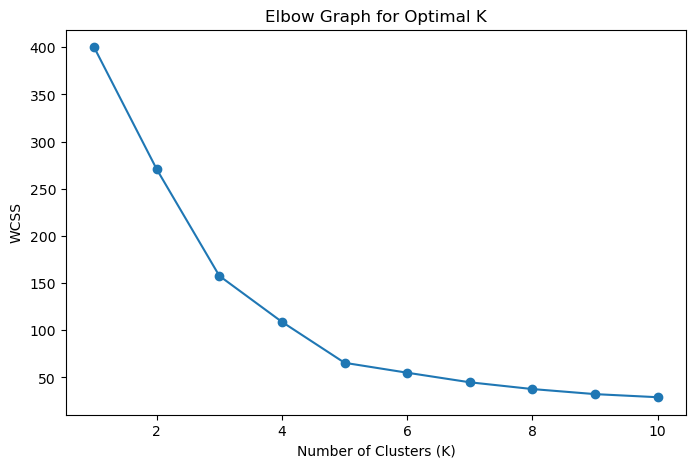

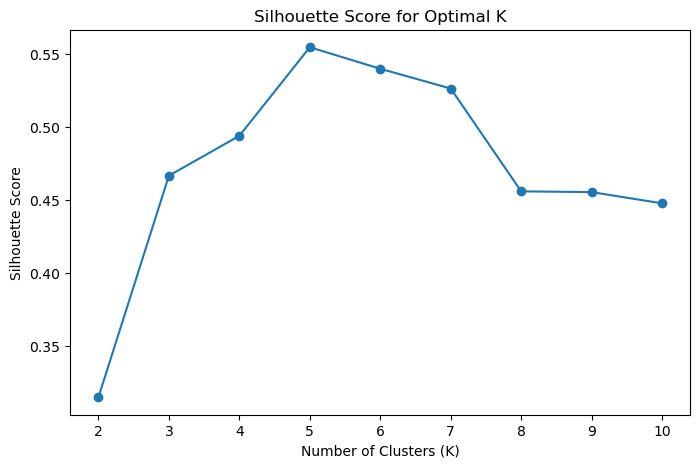

In [5]:
# Problem 4a - Data Clustering - determine best K
# set OMP_NUM_THREADS=1 in anaconda prompt before loading jupyter notebook to supress warning about memory leak with MKL

# compute WCSS for different K values
wcss = []
K_range = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Graph for Optimal K')
plt.show()

# compute silhouette score
silhouette_scores = []
for k in range(2, 11):  # K must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

C:\Users\mager\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


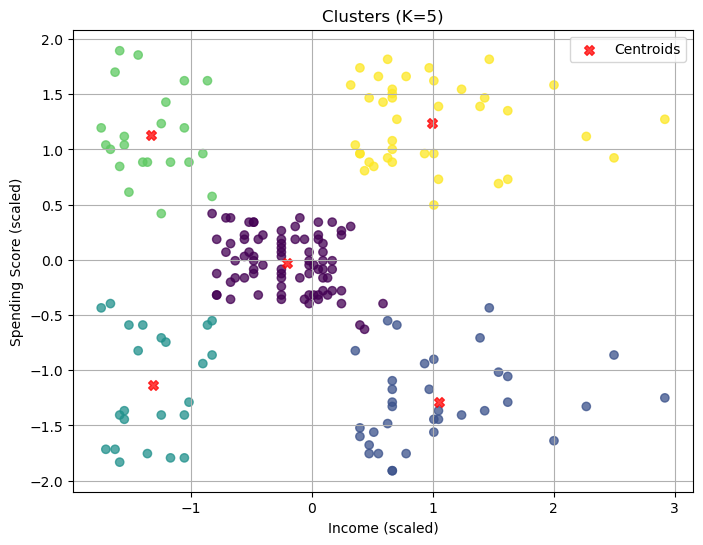

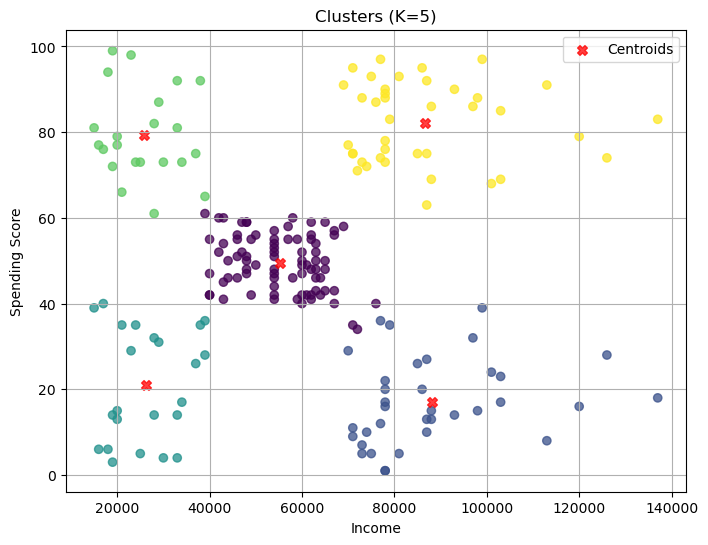

In [6]:
# Problem 4b - Data Clustering - Fit kmeans with k=5

# fit the kmeans model
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Income'], df_scaled['SpendingScore'], c=df_scaled['Cluster'], cmap='viridis', alpha=0.75)

# plot centroids on top
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, marker='X', label='Centroids', alpha=0.75)

# main plot variables
plt.xlabel('Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Clusters (K=5)')
plt.legend()
plt.grid(True)
plt.show()

# plot unscalled values with centroids
# get cluster centers in original scale
centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)

# add cluster labels back to original df
df['Cluster'] = df_scaled['Cluster']

# plot data
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['SpendingScore'], c=df['Cluster'], cmap='viridis', alpha=0.75)

# plot unscaled centroids on top
plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], c='red', s=50, marker='X', label='Centroids', alpha=0.75)

# main plot variables
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Clusters (K=5)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Problem 5 - Evaluate clusters

# map cluster numbers to labels
cluster_labels = {
    0: "M-Income M-Spending",
    1: "H-Income L-Spending",
    2: "L-Income L-Spending",
    3: "L-Income H-Spending",
    4: "H-Income H-Spending"
}

# add new column with labels
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)
print(df)

# create dummy variable for gender - unneeded
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# gender distribution by cluster
gender_dist = df.groupby(['Cluster_Label', 'Gender']).size().unstack()

# mean age by cluster
mean_age = df.groupby('Cluster_Label')['Age'].mean().round(0)

# print summary table
summary = gender_dist.copy()
summary['Mean_Age'] = mean_age
print(summary)

     Gender  Age  Income  SpendingScore  Cluster        Cluster_Label
0      Male   19   15000             39        2  L-Income L-Spending
1      Male   21   15000             81        3  L-Income H-Spending
2    Female   20   16000              6        2  L-Income L-Spending
3    Female   23   16000             77        3  L-Income H-Spending
4    Female   31   17000             40        2  L-Income L-Spending
..      ...  ...     ...            ...      ...                  ...
195  Female   35  120000             79        4  H-Income H-Spending
196  Female   45  126000             28        1  H-Income L-Spending
197    Male   32  126000             74        4  H-Income H-Spending
198    Male   32  137000             18        1  H-Income L-Spending
199    Male   30  137000             83        4  H-Income H-Spending

[200 rows x 6 columns]
Gender               Female  Male  Mean_Age
Cluster_Label                              
H-Income H-Spending      21    18      33.0
H-In

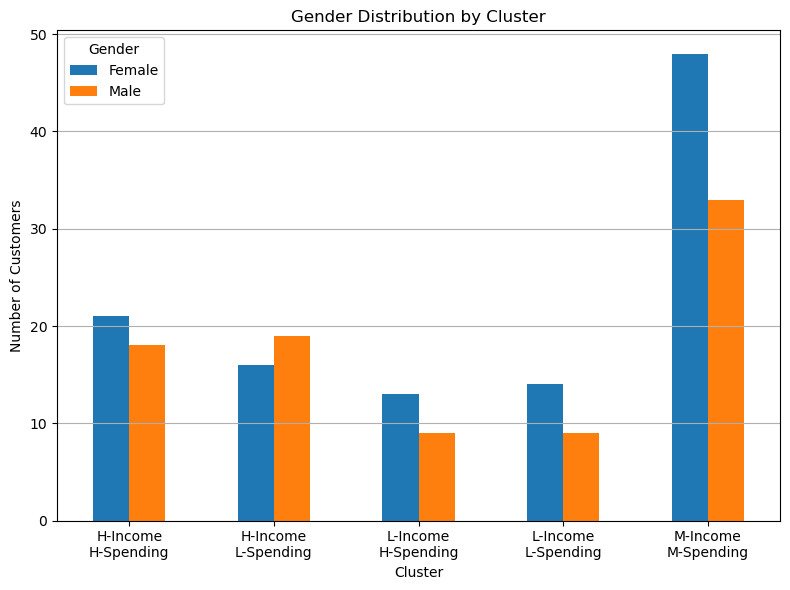

In [8]:
# pivot table for counts
gender_counts = df.groupby(['Cluster_Label', 'Gender']).size().unstack()

# plot bar graph
gender_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Gender Distribution by Cluster')
plt.ylabel('Number of Customers')
plt.xlabel('Cluster')
wrapped_labels = [label.replace(' ', '\n') for label in gender_counts.index]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()